In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

/Users/hechengwang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Stats


* Population Standard Deviation
    * $ \sigma = \sqrt{\dfrac{\Sigma(x - \bar{x})}{n}} $
* Sample Standard Deviation
    * $ s = \sqrt{\dfrac{\Sigma(x - \bar{x})}{n - 1}} $
    * The "-1" makes the SD larger, to account for the population SD.
* Precision
    * $ \dfrac{\text{True Positives}}{\text{True Positives + False Positives}} $
* Recall
    * $ \dfrac{\text{True Positives}}{\text{True Positives + False Negatives}} $
* F1 Score
    * $ \dfrac{2 * (\text{precision} * \text{recall})}{(\text{precision} + \text{recall})} $
    * The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0
* Bias/Variance
    * Bias is underfitting (oversimplification) and Variance is overfitting (overcomplification)
* Entropy
    * $ \sum_{i} -p_i \log_2(p_i) $
    * with $p_i$ being the fraction of examples in class i
* Information Gain
    * entropy(parent) - [weighted average] * entropy(children)
        * Decision trees try to maximize informtion gain
* Sigmoid
    * $ \sigma(a) = \dfrac{1} {1 + e^{-a}} $
* Bayes Rule
    * $ Pr(h|D) = \dfrac{Pr(D|h)Pr(h)}{Pr(D)} $
        * $ Pr(D) $ is the prior on the data
        * $ Pr(D|h) $ is the data given the hypothesis

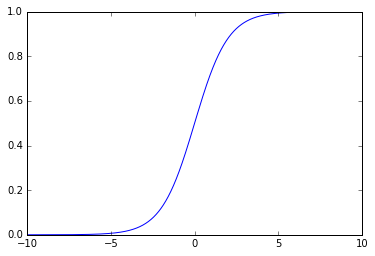

In [2]:
a = np.arange(-10, 10, 0.01)
plt.plot(a, 1/(1 + np.exp(-a)));

# Machine Learning

* Neural Networks
    * $ \sum_{i = 1}^K x_iw_i \ge \theta $ with the first term being the activation and the second tem being the firing threshold.
    * Perceptron Rule
        * For each iteration of the Neural Network, we'd want to change our weights if:
            * $ w_i = w_i + \Delta w_i $
                * $ \Delta w_i = \mathcal{N}(y - \hat{y})x_i $ for $\mathcal{N}$ the learning rate and $ x$ the input
                    * $ \hat{y} = (\sum_i w_i x_i \ge 0) $ for $ \hat{y} $ the prediction and $ y $ the target
                        * i.e. no change if true, change if false
                        * **Only useful for linearly separable data **
    * Gradient Descent (min least squares)
        * $ a = \sum_i x_i w_i $ and $ \hat{y} = \{a \ge 0\} $
        * $ e(w) = \frac{1}{2} \sum_{(x,y) \in D)}(y - a)^2 $
        * $ \frac{\delta e}{\delta w_i} = \frac{\delta}{\delta w_i} \frac{1}{2} \sum_{(x,y) \in D)}(y - a)^2$
        * $ = \sum_{(x,y) \in D)} (y-a) \frac{\delta}{\delta w_i} - \sum_i x_iw_i'$
        * $ = \sum_{(x,y) \in D)} (y-a)(-x_i) $
            * **Robust for non-linearly separable data too**
    * Restrication Bias
        * Representational Power: we can make perceptions, sigmoids, boolean functions, continuous functions, arbitrary complicated neural networks.
    * Preference Bias
        * Start with small random values
* SVM
    * Given the formula for two planes are $ w^Tx_1 + b = 1, w^Tx_2 + b = -1$, we want to maximize their distance:
        * $ \max(x_1 - x_2) = \max \dfrac{2}{||w||} $ while classifying everything correctly $ y_i (w^Tx_i + b) \ge 1 $
        * An easier solution is $ min \frac{1}{2} ||w|| ^ 2 $
            * $ W(a) = \sum_i \alpha_i - \frac{1}{2} \sum_{ij} \alpha_i \alpha_j y_i y_j x_i^T x_j $
                * $ x_i^T x_j $ is a measure of the similarity of x's. 
            * $ w = \sum_i \alpha_i y_i x_i $
                * Most $ \alpha_i = 0 $. So we make a **machine** that finds the **support vectors**.
                * Intuitively, only the points near the decision boundary are the ones that matter.
    * In the case that points are not linearly separable, we use the **kernel trick**:
        * $ \Phi(q) = < q_1^2, q_2^2, \sqrt2q_1q_2 > $.
        * $ \Phi(x)^T \Phi(y) = x_1y_1^2 + 2x_1y_1x_2y_2 + x_2y_2^2 $
            * Note that the kernel can be anything we want
            * Therefore, for any **distance calculating** kernal $K$, $W(\alpha) = \alpha_i - \frac{1}{2} \sum_{ij} \alpha_i \alpha_j y_i y_j K(x_i, x_j) $
* Naive Bayes
    * Goal is to maximize:
        * $h_{MAP} = argmax_h Pr(h|D) $ for maximum a posteriori
        * $h_{ML} = argmax_h Pr(D|h) $ for maximum likelihood